# 特征相关性分析-信息增益率

In [2]:
import pandas as pd
import numpy as np
#定义计算信息熵的函数：计算Infor(D)
def infor(data):
    a = pd.value_counts(data) / len(data)
    return sum(np.log2(a) * a * (-1))

In [3]:
#定义计算信息增益的函数：计算g(D|A)
def g(data,str1,str2):
    e1 = data.groupby(str1).apply(lambda x:infor(x[str2]))
    p1 = pd.value_counts(data[str1]) / len(data[str1])
    #计算Infor(D|A)
    e2 = sum(e1 * p1)
    return infor(data[str2]) - e2

In [3]:
#定义计算信息增益率的函数：计算gr(D,A)
def gr(data,str1,str2):
    return g(data,str1,str2)/infor(data[str1])

In [4]:
data=pd.read_csv('cm1.csv')
data.columns = ["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","bug"]
data.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,bug
0,4.795791,2.944439,2.833213,2.564949,5.866468,7.631921,0.039221,3.154017,4.531739,10.741938,...,4.682131,1.098612,2.302585,0.000000,2.708050,3.806662,5.356586,4.955827,3.583519,1.0
1,2.397895,1.098612,0.693147,0.693147,3.367296,4.748838,0.173953,1.845300,3.111736,6.415735,...,1.945910,0.000000,1.098612,0.000000,2.197225,2.302585,2.833213,2.564949,1.386294,0.0
2,2.567684,1.098612,0.693147,0.693147,2.940423,4.241876,0.297893,1.353197,3.214811,5.285899,...,1.482822,0.000000,0.272308,0.000000,2.096724,2.730036,2.965644,2.873735,1.386294,1.0
3,2.582273,1.133439,0.693147,0.742233,3.355709,4.743566,0.208077,1.679882,3.299870,6.209484,...,2.241741,0.000000,0.609235,0.000000,2.106455,2.408429,2.799602,2.582273,1.435380,1.0
4,2.484907,1.098612,0.693147,1.098612,2.944439,4.182508,0.131028,2.079442,2.324347,6.115252,...,2.079442,0.000000,0.693147,0.693147,2.197225,1.609438,2.484907,2.079442,1.386294,0.0


In [5]:
data['bug'].unique()

array([1., 0.])

In [6]:
features = ["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21"]
lists = []
for feature in features:
    lists.append(gr(data,feature,'bug'))
print(lists)

[0.12476749647985703, 0.10785733262259167, 0.127617182711144, 0.11535016546049609, 0.13017791859426667, 0.1361807179288151, 0.1168051512371751, 0.13561763291242257, 0.13501184732920435, 0.1348645413033126, 0.1324320311946366, 0.1348645413033126, 0.1238125790857142, 0.10760311676137198, 0.13087181821915375, 0.09790314266654054, 0.09921658454650495, 0.12185562088922344, 0.1287932018516636, 0.12634534674916612, 0.10858505671267593]


In [7]:
data1 = data.drop(labels=['bug'],axis=1)

In [8]:
IGR = pd.Series(lists)
IGR.index = data1.columns
IGR.sort_values(ascending=False)

6     0.136181
8     0.135618
9     0.135012
10    0.134865
12    0.134865
11    0.132432
15    0.130872
5     0.130178
19    0.128793
3     0.127617
20    0.126345
1     0.124767
13    0.123813
18    0.121856
7     0.116805
4     0.115350
21    0.108585
2     0.107857
14    0.107603
17    0.099217
16    0.097903
dtype: float64

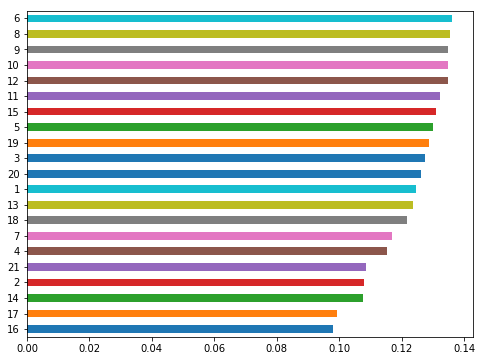

In [10]:
#let's plot the ordered mutual_info values per feature
import matplotlib.pyplot as plot
IGR.sort_values(ascending=True).plot.barh(figsize=(8, 6))

# 特征相关性分析-互信息

In [11]:
X_1 = data.drop(labels=['bug'], axis=1)
y_1 = data['bug']

In [12]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_1, y_1)
mutual_info

array([0.24632781, 0.21774335, 0.13925257, 0.19466517, 0.3188001 ,
       0.3336328 , 0.27008891, 0.26476057, 0.29141172, 0.29937478,
       0.32932976, 0.29458038, 0.31478423, 0.1726649 , 0.24230681,
       0.08163525, 0.17438593, 0.29739099, 0.33246072, 0.29119411,
       0.27015775])

In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_1.columns
mutual_info.sort_values(ascending=False)

6     0.333633
19    0.332461
11    0.329330
5     0.318800
13    0.314784
10    0.299375
18    0.297391
12    0.294580
9     0.291412
20    0.291194
21    0.270158
7     0.270089
8     0.264761
1     0.246328
15    0.242307
2     0.217743
4     0.194665
17    0.174386
14    0.172665
3     0.139253
16    0.081635
dtype: float64

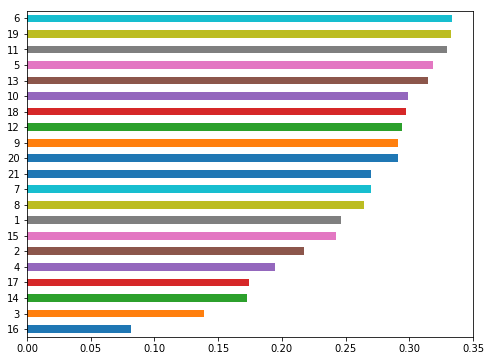

In [14]:
#let's plot the ordered mutual_info values per feature
import matplotlib.pyplot as plot
mutual_info.sort_values(ascending=True).plot.barh(figsize=(8, 6))

# 特征相关性分析-卡方值

In [15]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_1,y_1)
f_p_values

(array([ 51.77824389,  41.31397615,  23.41608075,  30.92092048,
         63.78339809,  77.02081247,   9.82503771,  39.28547146,
         28.70779778, 134.42739896,  27.39461731, 176.46732835,
         70.6648874 ,  75.23971699,  94.32208471,  26.50222903,
         14.9396338 ,  58.74622599,  67.72336488,  86.37766003,
         58.50989849]),
 array([6.21365236e-13, 1.29638667e-10, 1.30483211e-06, 2.68758983e-08,
        1.38879035e-15, 1.69165853e-18, 1.72152172e-03, 3.66155682e-10,
        8.41641548e-08, 4.40539302e-31, 1.65892349e-07, 2.86277567e-40,
        4.23360832e-17, 4.16895945e-18, 2.68141868e-22, 2.63234198e-07,
        1.11006281e-04, 1.79377283e-14, 1.88121002e-16, 1.48654741e-20,
        2.02270723e-14]))

In [16]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_1.columns
p_values

1     6.213652e-13
2     1.296387e-10
3     1.304832e-06
4     2.687590e-08
5     1.388790e-15
6     1.691659e-18
7     1.721522e-03
8     3.661557e-10
9     8.416415e-08
10    4.405393e-31
11    1.658923e-07
12    2.862776e-40
13    4.233608e-17
14    4.168959e-18
15    2.681419e-22
16    2.632342e-07
17    1.110063e-04
18    1.793773e-14
19    1.881210e-16
20    1.486547e-20
21    2.022707e-14
dtype: float64

In [17]:
p_values.sort_index(ascending=False)

9     8.416415e-08
8     3.661557e-10
7     1.721522e-03
6     1.691659e-18
5     1.388790e-15
4     2.687590e-08
3     1.304832e-06
21    2.022707e-14
20    1.486547e-20
2     1.296387e-10
19    1.881210e-16
18    1.793773e-14
17    1.110063e-04
16    2.632342e-07
15    2.681419e-22
14    4.168959e-18
13    4.233608e-17
12    2.862776e-40
11    1.658923e-07
10    4.405393e-31
1     6.213652e-13
dtype: float64

# --------------------------------------------------------------------------------------------

In [1]:
del data['17']
del data['16']
del data['14']

NameError: name 'data' is not defined

In [18]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,15,18,19,20,21,bug
0,4.795791,2.944439,2.833213,2.564949,5.866468,7.631921,0.039221,3.154017,4.531739,10.741938,0.524729,7.851934,4.682131,2.302585,3.806662,5.356586,4.955827,3.583519,1.0
1,2.397895,1.098612,0.693147,0.693147,3.367296,4.748838,0.173953,1.845300,3.111736,6.415735,0.039221,3.552773,1.945910,1.098612,2.302585,2.833213,2.564949,1.386294,0.0
2,2.567684,1.098612,0.693147,0.693147,2.940423,4.241876,0.297893,1.353197,3.214811,5.285899,0.019803,2.479867,1.482822,0.272308,2.730036,2.965644,2.873735,1.386294,1.0
3,2.582273,1.133439,0.693147,0.742233,3.355709,4.743566,0.208077,1.679882,3.299870,6.209484,0.040379,3.353158,2.241741,0.609235,2.408429,2.799602,2.582273,1.435380,1.0
4,2.484907,1.098612,0.693147,1.098612,2.944439,4.182508,0.131028,2.079442,2.324347,6.115252,0.019803,3.261552,2.079442,0.693147,1.609438,2.484907,2.079442,1.386294,0.0


In [19]:
X = data.drop(labels=['bug'], axis=1)
y = data['bug']

# 特征相关性分析阶段

In [15]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#Symmetrical Uncertainty
#entropy
from scipy.stats import entropy
import numpy as np
#Joint Entropy
def jEntropy(Y,X):
    YX = np.c_[Y,X]
    return entropy(YX)

#conditional entropy
def cEntropy(Y, X):
    return jEntropy(Y, X) - entropy(X)

#SU
def symmetricalUncertain(Y,X):
    n = float(y.shape[0])
    vals = np.unique(Y)
    # Computing Entropy for the feature x. 
    Hx = entropy(X)
    # Computing Entropy for the feature y.
    Hy = entropy(Y)
    #Computing Joint entropy between x and y.
    Hxy = jEntropy(Y,X)
    IG = Hx-Hxy
    return 2*IG/(Hx+Hy)

In [43]:
top_n1 =[]
for i in X.columns.values:
    X[i]=X[i].astype('float64')
    top_n1.append(symmetricalUncertain(X[i],X["18"]))
# print (top_n1)
top_n2=[row[1] for row in top_n1]
print (top_n2)

col_name1 = np.array(X.columns)
a1 = pd.DataFrame(top_n2)
b1 = pd.DataFrame(col_name1)
info3 = pd.concat([a1,b1], axis=1)
info3.columns = ['Score','Features']
info3

[3.2712604874233254e-16, 3.290239222080544e-16, 3.2966457051636757e-16, 3.286980063242837e-16, 3.27533246740083e-16, 3.276616033663623e-16, 3.3884683450411932e-16, 3.2839759013418693e-16, 3.26888668630098e-16, 3.2852015290794234e-16, 3.4852335284539824e-16, 3.3212288687035995e-16, 3.2892694322566473e-16, 3.3955974399462235e-16, 3.291481705187258e-16, 3.2795198981466933e-16, 3.299046331607329e-16, 3.29773825896211e-16]


,Score,Features
0,3.271260e-16,1
1,3.290239e-16,2
2,3.296646e-16,3
3,3.286980e-16,4
4,3.275332e-16,5
5,3.276616e-16,6
6,3.388468e-16,7
7,3.283976e-16,8
8,3.268887e-16,9
9,3.285202e-16,10


In [44]:
SU = pd.Series(top_n2)
SU.index = X.columns
SU.sort_values(ascending=False)

11    3.485234e-16
15    3.395597e-16
7     3.388468e-16
12    3.321229e-16
20    3.299046e-16
21    3.297738e-16
3     3.296646e-16
18    3.291482e-16
2     3.290239e-16
13    3.289269e-16
4     3.286980e-16
10    3.285202e-16
8     3.283976e-16
19    3.279520e-16
6     3.276616e-16
5     3.275332e-16
1     3.271260e-16
9     3.268887e-16
dtype: float64

In [45]:
corr_features = ["1","2","3","4","7","12","19","21","18"]
data2=data.drop(corr_features,axis=1)
data2

,5,6,8,9,10,11,13,15,20,bug
0,5.866468,7.631921,3.154017,4.531739,10.741938,0.524729,4.682131,2.302585,4.955827,1.0
1,3.367296,4.748838,1.845300,3.111736,6.415735,0.039221,1.945910,1.098612,2.564949,0.0
2,2.940423,4.241876,1.353197,3.214811,5.285899,0.019803,1.482822,0.272308,2.873735,1.0
3,3.355709,4.743566,1.679882,3.299870,6.209484,0.040379,2.241741,0.609235,2.582273,1.0
4,2.944439,4.182508,2.079442,2.324347,6.115252,0.019803,2.079442,0.693147,2.079442,0.0
5,5.899897,7.723669,3.260018,4.513603,10.943937,0.559616,4.663439,3.091042,4.983607,1.0
6,6.043292,7.874373,3.685425,4.228684,11.534002,0.629790,4.759788,2.572034,5.103368,1.0
7,2.639057,3.624341,1.791759,2.116256,5.212106,0.009950,1.791759,0.000000,1.609438,0.0
8,5.172343,6.864962,3.078533,3.853954,9.895320,0.277632,4.018245,1.667918,4.233672,1.0
9,1.699974,2.364701,0.916291,2.005499,2.737729,0.000000,1.098612,0.000000,0.894490,1.0


In [47]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop("bug",axis=1),
    data2["bug"],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((179, 9), (77, 9))

In [48]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score,roc_auc_score
SVM = LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
#SVM.score(X_test,y_test)
f1_score1 = f1_score(y_test,y_pred)
roc_auc_score1 = roc_auc_score(y_test,y_pred)
print(f1_score1)
print(roc_auc_score1)

0.823529411764706
0.8404761904761904
